# Hypothesis Testing Exercise on Laboratory Test Turn Around Time(TAT) Data

**Problem Statement -** A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
- Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

#### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Dataset

In [2]:
df = pd.read_csv('LabTAT.csv')
df

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [3]:
#renaming the label names to remove empty spaces
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', ''))
df.columns = cols

#### EDA on dataset

In [4]:
# Check first 5 records
df.head(5)

,Laboratory1,Laboratory2,Laboratory3,Laboratory4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [5]:
# Check last 5 records
df.tail(5)

,Laboratory1,Laboratory2,Laboratory3,Laboratory4
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87
119,182.09,215.17,221.49,162.21


In [6]:
# Check for data types, non-null values & memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Laboratory1  120 non-null    float64
 1   Laboratory2  120 non-null    float64
 2   Laboratory3  120 non-null    float64
 3   Laboratory4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [7]:
# Get central tendency, dispersion and shape of dataset’s distribution
df.describe()

,Laboratory1,Laboratory2,Laboratory3,Laboratory4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [8]:
# Checking Null values
df.isna().sum()

Laboratory1    0
Laboratory2    0
Laboratory3    0
Laboratory4    0
dtype: int64

In [9]:
# Check the dimensions of the DataFrame
df.shape

(120, 4)

In [10]:
# Check for the random sample from the DataFrame
df.sample(5)

,Laboratory1,Laboratory2,Laboratory3,Laboratory4
35,181.69,179.32,200.58,174.79
98,178.81,197.38,195.60,132.49
19,194.17,186.85,229.02,175.05
61,196.13,165.12,205.01,152.40
11,193.37,140.55,198.37,183.67


#### Visualize data

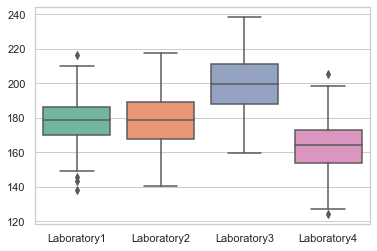

In [11]:
sns.set(style="whitegrid")
ax = sns.boxplot(data = df, orient = "v", palette = "Set2")

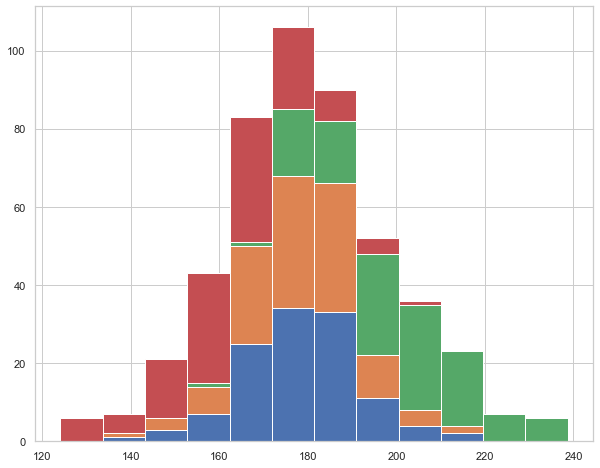

In [12]:
# Stacked histogram
fig, axs = plt.subplots(1, figsize = (10, 8))
plt1 = plt.hist([df.Laboratory1, df.Laboratory1, df.Laboratory3, df.Laboratory4], bins = int(180/15), stacked = True)
plt.show()

In [13]:
from scipy.stats import shapiro

Consider significance level i.e. $\alpha$ as 5%. <br>
**Null hypothesis (H0)** - There is no statistical significance between the two variables. <br>
**Alternate Hypothesis (H1)** - There is a statistically significant relationship between two variables.

In [14]:
shapiro(df.Laboratory1)

ShapiroResult(statistic=0.9901824593544006, pvalue=0.5506953597068787)

P value for Unit A is 0.55 which is greater than 0.05 i.e. $\alpha$.

In [15]:
shapiro(df.Laboratory2)

ShapiroResult(statistic=0.9936322569847107, pvalue=0.8637524843215942)

P value for Unit A is 0.86 which is greater than 0.05 i.e. $\alpha$.

In [16]:
shapiro(df.Laboratory3)

ShapiroResult(statistic=0.9886345267295837, pvalue=0.4205053448677063)

P value for Unit A is 0.42 which is greater than 0.05 i.e. $\alpha$.

In [17]:
shapiro(df.Laboratory4)

ShapiroResult(statistic=0.9913753271102905, pvalue=0.6618951559066772)

P value for Unit A is 0.66 which is greater than 0.05 i.e. $\alpha$.

Hence, H0 is accepted. Thus, data is normally distributed.

We will perform one way ANOVA test.

In [19]:
from scipy import stats

In [21]:
stats.f_oneway(df["Laboratory1"], df["Laboratory2"], df["Laboratory3"], df["Laboratory4"])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

P value of the One way Anova test is = 2.12e-57 < α.

Hence, H1 is accepted.